# Mushroom Classification

reference:
Comparing Various ML models(ROC curve comparison) by Niraj Verma 

https://www.kaggle.com/nirajvermafcb/comparing-various-ml-models-roc-curve-comparison

# 1. EDA

In [29]:
# import needed libraries

import pandas as pd
import numpy as np
import itertools
import os
from sklearn.preprocessing import LabelEncoder


from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing


from sklearn.decomposition import PCA


from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


import matplotlib.pyplot as plt
import seaborn as sns


# warning 무시하도록
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load dataset

file = "C:\GitHub\SongKim\mushrooms.csv"
df = pd.read_csv(file)

In [3]:
# explore data

df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
# explore data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [5]:
# explore data

df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
# check for null variables

df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [7]:
# check for the number of classification output
# turns out either the mushroom is poisonous or not

df['class'].unique()

array(['p', 'e'], dtype=object)

In [8]:
# check for the number of features and instances
# turns out the data has 22 features and 8124 instances

df.shape

(8124, 23)

In [9]:
# We can see that the dataset has values in strings.
# need to convert all the unique values to integers. 
# Thus we perform label encoding on the data.

labelencoder=LabelEncoder()
for col in df.columns:
    df[col] = labelencoder.fit_transform(df[col])
 
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [10]:
# check the numbers of class 0 and 1 (poisonous or not) by groupby('class')

print(df.groupby('class').size())

class
0    4208
1    3916
dtype: int64


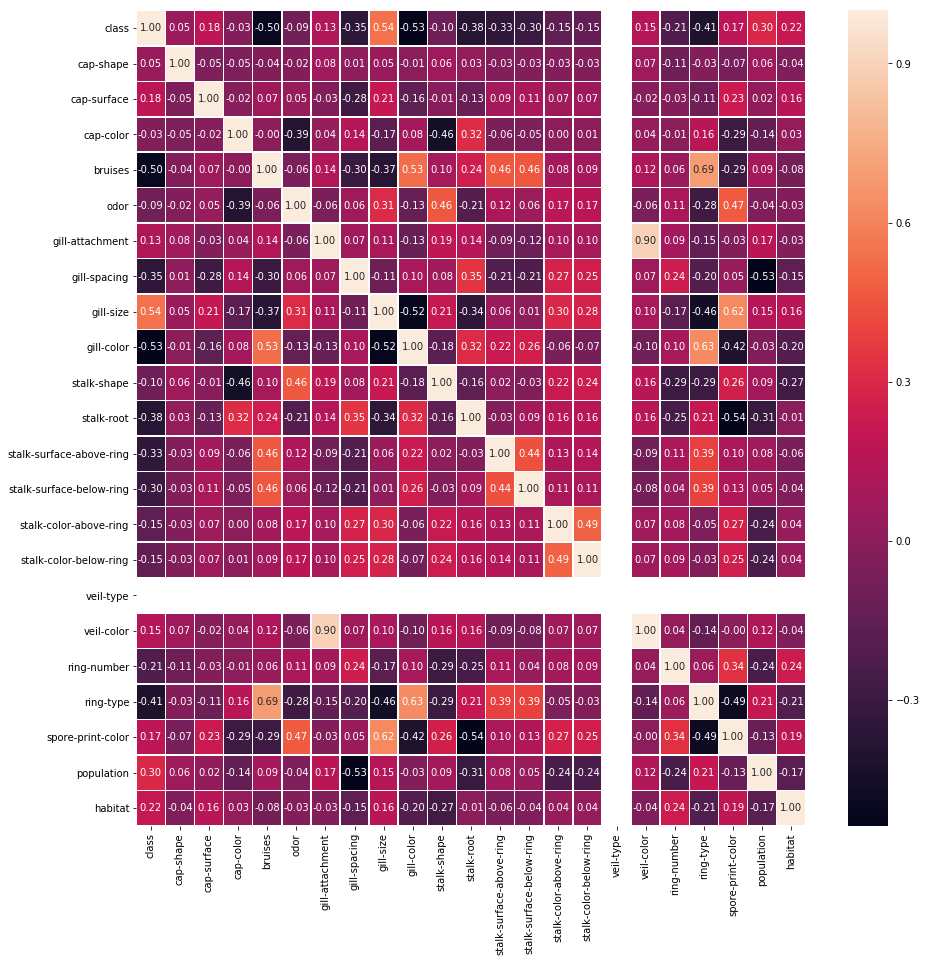

In [11]:
# correlation of variables

plt.figure(figsize=(15,15))
sns.heatmap(data = df.corr(), annot=True, 
fmt = '.2f', linewidths=.5)


# 2. Data Reformations

In [12]:
# separate features and target variable

X = df.iloc[:,1:23]  # all rows, all the features and no labels
y = df.iloc[:, 0]  # all rows, label only

print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [13]:
# normalize data variable values

# Create the Scaler object
scaler = preprocessing.StandardScaler()

# Fit your data on the scaler object
X = scaler.fit_transform(X)
print(type(X))
X

<class 'numpy.ndarray'>


array([[ 1.02971224,  0.14012794, -0.19824983, ..., -0.67019486,
        -0.5143892 ,  2.03002809],
       [ 1.02971224,  0.14012794,  1.76587407, ..., -0.2504706 ,
        -1.31310821, -0.29572966],
       [-2.08704716,  0.14012794,  1.37304929, ..., -0.2504706 ,
        -1.31310821,  0.86714922],
       ...,
       [-0.8403434 ,  0.14012794, -0.19824983, ..., -1.50964337,
        -2.11182722,  0.28570978],
       [-0.21699152,  0.95327039, -0.19824983, ...,  1.42842641,
         0.28432981,  0.28570978],
       [ 1.02971224,  0.14012794, -0.19824983, ...,  0.16925365,
        -2.11182722,  0.28570978]])

In [14]:
# change X numpy.ndarray datatype into dataFrame datatype

X= pd.DataFrame(data = X)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1.029712,0.140128,-0.198250,1.185917,0.881938,0.162896,-0.438864,1.494683,-0.228998,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
1,1.029712,0.140128,1.765874,1.185917,-1.970316,0.162896,-0.438864,-0.669038,-0.228998,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.250471,-1.313108,-0.295730
2,-2.087047,0.140128,1.373049,1.185917,-0.544189,0.162896,-0.438864,-0.669038,0.053477,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.250471,-1.313108,0.867149
3,1.029712,0.953270,1.373049,1.185917,0.881938,0.162896,-0.438864,1.494683,0.053477,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
4,1.029712,0.140128,-0.591075,-0.843230,0.406562,0.162896,2.278612,-0.669038,-0.228998,0.873511,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,-1.272216,-0.250471,-2.910546,-0.295730


In [15]:
print(type(X))

<class 'pandas.core.frame.DataFrame'>


# 3. PCA

In [16]:
# PCA

pca = PCA()
pca.fit_transform(X)
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [17]:
# covariance: degree to which random variables vary similarly.

covariance=pca.get_covariance()
explained_variance=pca.explained_variance_

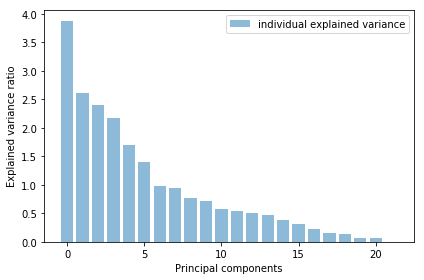

In [18]:
# draw bar graph of covariance ratio


plt.figure(figsize=(6, 4))

plt.bar(range(22), explained_variance, alpha=0.5, align='center',
        label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

In [19]:
# perform PCA by taking 16 components with maximum variance

pca_modified = PCA(n_components=16)
pca_modified.fit_transform(X)

array([[-0.5743219 , -0.97578135, -1.22176154, ...,  0.61185548,
        -0.51996599, -0.78254366],
       [-2.2821023 ,  0.27906633, -1.20049669, ..., -0.91655333,
        -0.11307822, -0.73093408],
       [-1.85803562, -0.27097236, -1.37237069, ..., -0.51947043,
         0.01652548, -0.6561675 ],
       ...,
       [-1.62151632, -0.75753671,  2.73357994, ..., -0.18253987,
        -0.51961303, -0.70768708],
       [ 3.67060561, -1.0327745 ,  0.1684595 , ..., -0.00426537,
        -0.08688401, -0.11464249],
       [-1.57520272, -1.2285814 ,  2.44722789, ..., -0.08029358,
         0.91606764, -0.77988482]])

In [20]:
# split the data into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# 4. Classification

**Random Forest**

In [22]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print('The accuracy of the Random Forest is:', metrics.accuracy_score(prediction, y_test))

The accuracy of the Random Forest is: 1.0


**Logistic Regression**

In [23]:
model = LogisticRegression()
model.fit(X_train,y_train)
prediction = model.predict(X_test)
print('The accuracy of the Logistic Regression is:', metrics.accuracy_score(prediction, y_test))

The accuracy of the Logistic Regression is: 0.965135356849877


**Decision Tree**

In [24]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print('The accuracy of the Decision Tree is:', metrics.accuracy_score(prediction, y_test))

The accuracy of the Decision Tree is: 1.0


**SVM**

In [25]:
model = SVC()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print('The accuracy of the SVM model is:', metrics.accuracy_score(prediction, y_test))

The accuracy of the SVM model is: 1.0


**XGBoost**

In [31]:
model = XGBClassifier()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print('The accuracy of the XGBoost model is:', metrics.accuracy_score(prediction, y_test))

The accuracy of the XGBoost model is: 1.0


# 5. Observation